In [1]:
import sys

!{sys.executable} -m pip install binarytree

You should consider upgrading via the '/Users/conorohalloran/Documents/ChiFinesse/march_madness/.venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!{sys.executable} -m pip install pandas

You should consider upgrading via the '/Users/conorohalloran/Documents/ChiFinesse/march_madness/.venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install pillow

You should consider upgrading via the '/Users/conorohalloran/Documents/ChiFinesse/march_madness/.venv/bin/python -m pip install --upgrade pip' command.


In [4]:
!{sys.executable} -m pip install bracketeer

You should consider upgrading via the '/Users/conorohalloran/Documents/ChiFinesse/march_madness/.venv/bin/python -m pip install --upgrade pip' command.


In [44]:
# locations of each slot on the image
# order is play-in games,
# then first round by section of the bracket W, X, Y, Z, from top to bottom
# then second round games for W, X, Y, and Z and so on
slot_coordinates = {
    2021: {
        1: (372, 32),
        2: (372, 50),
        3: (30, 328),
        4: (30, 346),
        5: (695, 325),
        6: (695, 343),
        7: (370, 642),
        8: (370, 659),
        9: (30, 38),
        10: (30, 55),
        11: (30, 74),
        12: (30, 92),
        13: (30, 110),
        14: (30, 128),
        15: (30, 146),
        16: (30, 164),
        17: (30, 182),
        18: (30, 199),
        19: (30, 218),
        20: (30, 236),
        21: (30, 254),
        22: (30, 272),
        23: (30, 290),
        24: (30, 308),
        25: (30, 370),
        26: (30, 388),
        27: (30, 406),
        28: (30, 424),
        29: (30, 442),
        30: (30, 460),
        31: (30, 478),
        32: (30, 496),
        33: (30, 514),
        34: (30, 532),
        35: (30, 550),
        36: (30, 567),
        37: (30, 586),
        38: (30, 604),
        39: (30, 622),
        40: (30, 640),
        41: (815, 38),
        42: (815, 55),
        43: (815, 74),
        44: (815, 92),
        45: (815, 110),
        46: (815, 128),
        47: (815, 146),
        48: (815, 164),
        49: (815, 182),
        50: (815, 199),
        51: (815, 218),
        52: (815, 236),
        53: (815, 254),
        54: (815, 272),
        55: (815, 290),
        56: (815, 308),
        57: (815, 370),
        58: (815, 388),
        59: (815, 406),
        60: (815, 424),
        61: (815, 442),
        62: (815, 460),
        63: (815, 478),
        64: (815, 496),
        65: (815, 514),
        66: (815, 532),
        67: (815, 550),
        68: (815, 567),
        69: (815, 586),
        70: (815, 604),
        71: (815, 622),
        72: (815, 640),
        73: (155, 47),
        74: (155, 83),
        75: (155, 119),
        76: (155, 155),
        77: (155, 191),
        78: (155, 227),
        79: (155, 263),
        80: (155, 299),
        81: (155, 379),
        82: (155, 415),
        83: (155, 451),
        84: (155, 487),
        85: (155, 523),
        86: (155, 559),
        87: (155, 595),
        88: (155, 631),
        89: (735, 47),
        90: (735, 83),
        91: (735, 119),
        92: (735, 155),
        93: (735, 191),
        94: (735, 227),
        95: (735, 263),
        96: (735, 299),
        97: (735, 379),
        98: (735, 415),
        99: (735, 451),
        100: (735, 487),
        101: (735, 523),
        102: (735, 559),
        103: (735, 595),
        104: (735, 631),
        105: (232, 65),
        106: (232, 137),
        107: (232, 209),
        108: (232, 281),
        109: (232, 397),
        110: (232, 469),
        111: (232, 541),
        112: (232, 613),
        113: (668, 65),
        114: (668, 137),
        115: (668, 209),
        116: (668, 281),
        117: (668, 397),
        118: (668, 469),
        119: (668, 541),
        120: (668, 613),
        121: (298, 100),
        122: (298, 244),
        123: (298, 432),
        124: (298, 576),
        125: (601, 100),
        126: (601, 244),
        127: (601, 432),
        128: (601, 576),
        129: (358, 172),
        130: (358, 504),
        131: (540, 172),
        132: (540, 504),
        133: (420, 457),
        134: (435, 219),
        135: (435, 339)
    }
}


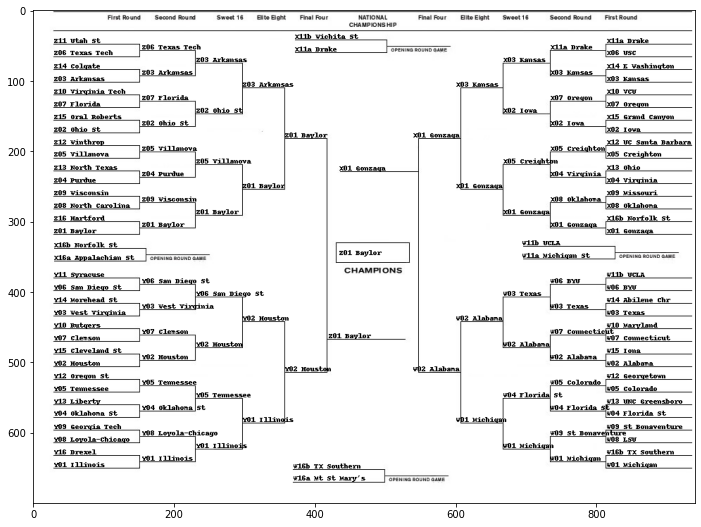

In [45]:
import os

from binarytree import Node
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw

ID = 'id'
PRED = 'pred'
SEASON = 'season'
TEAM = 'teamname'


class extNode(Node):
    def __init__(self, value, left=None, right=None, parent=None):
        Node.__init__(self, value, left=left, right=right)
        if parent is not None and isinstance(parent, extNode):
            self.__setattr__('parent', parent)
        else:
            self.__setattr__('parent', None)

    def __setattr__(self, name, value):
        # Magically set the parent to self when a child is created
        if (name in ['left', 'right']
                and value is not None
                and isinstance(value, extNode)):
            value.parent = self
        object.__setattr__(self, name, value)
        
def build_bracket(output_path='output.png', 
    teamsPath='data/Teams.csv',
    seedsPath='data/TourneySeeds.csv',
    slotsPath='data/TourneySlots.csv',
    submissionPath='data/submit.csv',
    year=2017):

    assert os.path.isfile(teamsPath), '{} is not a valid file path for teamsPath.'.format(teamsPath)
    assert os.path.isfile(seedsPath), '{} is not a valid file path for seedsPath.'.format(seedsPath)
    assert os.path.isfile(slotsPath), '{} is not a valid file path for slotsPath.'.format(slotsPath)
    assert os.path.isfile(submissionPath), '{} is not a valid file path for submissionPath.'.format(submissionPath)

    def cols_to_lower(df):
        return df.rename(columns={col: col.lower() for col in df.columns})

    teams_df = cols_to_lower(pd.read_csv(teamsPath))
    seeds_df = cols_to_lower(pd.read_csv(seedsPath))
    slots_df = cols_to_lower(pd.read_csv(slotsPath))
    submit = cols_to_lower(pd.read_csv(submissionPath))

    df = seeds_df.merge(teams_df, left_on='teamid', right_on='teamid')
    keepcols = [SEASON, 'seed', 'teamid', TEAM]
    df = df.loc[df[SEASON] == year, keepcols].reset_index(drop=True)

    # Create bracket tree from slot data
    s = slots_df[slots_df['season'] == year]
    seed_slot_map = {0:'R6CH'}
    bkt = extNode(0)

    counter = 1
    current_nodes = [bkt]
    current_id = -1
    current_index = 0

    while current_nodes:
        next_nodes = []
        current_index = 0
        while current_index < len(current_nodes):
            node = current_nodes[current_index]
            if len(s[s['slot'] == seed_slot_map[node.value]].index) > 0:
                node.left = extNode(counter)
                node.right = extNode(counter + 1)
                seed_slot_map[counter] = s[s['slot'] == seed_slot_map[node.value]].values[0][2]
                seed_slot_map[counter + 1] = s[s['slot'] == seed_slot_map[node.value]].values[0][3]
                next_nodes.append(node.left)
                next_nodes.append(node.right)
                counter += 2
            current_index += 1
            current_id += 1
        current_nodes = next_nodes

    num_slots = len(seed_slot_map.keys())

    def get_team_id(seedMap):
        return (seedMap, df[df['seed'] == seed_slot_map[seedMap]]['teamid'].values[0])

    # Solve bracket using predictions
    for level in list(reversed(bkt.levels)):
        for ix, node in enumerate(level[0: len(level) // 2]):
            team1 = get_team_id(level[ix * 2].value)
            team2 = get_team_id(level[ix * 2 + 1].value)
            if team2[1] < team1[1]:
                temp = team1
                team1 = team2
                team2 = temp
            gid = '{season}_{t1}_{t2}'.format(season=year, t1=team1[1], t2=team2[1])
            if submit[submit[ID] == gid][PRED].values[0] >= 0.5:
                level[ix * 2].parent.value = team1[0]
            else: 
                level[ix * 2].parent.value = team2[0]


    # Create data for writing to image
    slotdata = []
    for ix, key in enumerate([b for a in bkt.levels for b in a]):
        xy = slot_coordinates[year][num_slots - ix]
        try:
            st = '{seed} {team}'.format(
                seed=seed_slot_map[key.value],
                team=df[df['seed']==seed_slot_map[key.value]][TEAM].values[0]
            )
        except IndexError as e:
            st = str(seed_slot_map[key.value])
        slotdata.append((xy, st))


    # Create bracket image
    # relevant:
    # https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
    emptyBracketPath = 'empty_brackets/2017.jpg'
    img = Image.open(emptyBracketPath)
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    # draw.text((x, y),"Sample Text",(r,g,b))
    for slot in slotdata:
        draw.text(slot[0], str(slot[1]), (0, 0, 0))

    dpi = 72
    margin = 0.05  # (5% of the width/height of the figure...)
    xpixels, ypixels = 940, 700

    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi
    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    ax.imshow(np.asarray(img))
    # plt.show() # for in notebook
    img.save(output_path)


b = build_bracket(
    output_path="2021_bracket.png",
    teamsPath="../../data/MTeams.csv",
    seedsPath="../../data/MNCAATourneySeeds.csv",
    slotsPath="../../data/MNCAATourneySlots.csv",
    submissionPath="ncaa-march-madness-submission.csv",
    year=2021
)
